In [1]:
import numpy

In [2]:
# global variables
PI = numpy.pi
ECC = 0.5  # orbital eccentricity
G = 6.67408e-11  # Newton's constant in m^3 / kg / s
MSUN = 1.989e30  # Solar mass in kg
M1 = MSUN  # primary mass in kg
M2 = 3.285e23  # Mercury mass in kg
MU = M1 * M2 / (M1 + M2)  # reduced mass in kg
M = M1 + M2  # total mass in kg
AU = 1.496e11  # 1 astronomical unit in m
L = 9e38  # Mercury angular momentum in J*s
RL = L**2 / (G * M * MU**2)  # semi-latus rectum in meters
E = (MU**3 / 2) * (G*M / L)**2 * (ECC**2 - 1)  # total energy in J

In [3]:
# -- functions ----------------------------------------------------------------

def _format_scientific(x):
    """Format an arbitrary floating-point number in scientific notation
    """
    n = int(numpy.floor(numpy.log10(x)))
    return '%.3g' % x if (n >= -1 and n <= 4) else \
        r'%.3g \times 10^{%d}' % (x / 10**n, n)

def rhs(y):
    """Returns the right-hand side of the equation of motion at a single
    point, given the following parameters:

        y: solution value at the previous point
    """
    return L * (1 + ECC * numpy.cos(y))**2 / (MU * RL**2)

def rk4(y, h):
    """Returns the estimated integral at a new point using the RK4 method (an
    extension of Simpson's rule) given the following parameters:

        y: the function value at the previous point
        h: the integration step size
    """
    k1 = rhs(y)
    k2 = rhs(y + h*k1/2)
    k3 = rhs(y + h*k2/2)
    k4 = rhs(y + h*k3)
    return y + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

In [4]:
# set initial conditions
a = RL / (1 - ECC**2)
T = numpy.sqrt(4 * PI**2 * a**3 / (G * M))  # orbital period
dt = T / 1e4  # step size, determined as 0.01% of T
t = numpy.arange(0, T, dt)  # time samples
phi = [0]  # orbital phase initial condition

In [5]:
# do the simulation
for i in range(1, t.size):
    phi.append(rk4(phi[i-1], dt))

In [6]:
# get radial position
phi = numpy.array(phi)  # NumPy arrays are easier to work with
r = RL / (1 + ECC * numpy.cos(phi))  # from the parametric equation for r

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


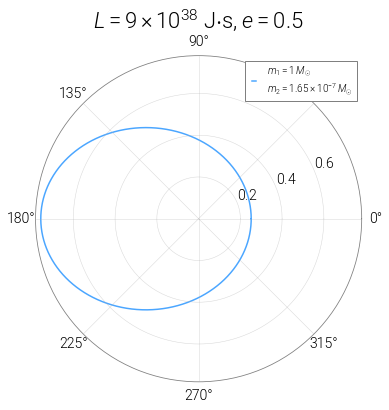

In [7]:
# plot the equivalent-one-body orbital track
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(6, 6)) 
ax = fig.gca(projection='polar')
ax.plot(phi, r/AU, '#4ba6ff', label='$m_1 = %s\,M_{\odot}$\n$m_2 = %s\,M_{\odot}$' % (
        _format_scientific(M1/MSUN), _format_scientific(M2/MSUN)))
ax.grid(True)

ax.legend(framealpha=1)
ax.set_rticks([0.2, 0.4, 0.6])
ax.set_title(r'$L=%s$ J$\cdot$s, $e=%.3g$' % (
    _format_scientific(L), ECC), va='bottom')
plt.show()

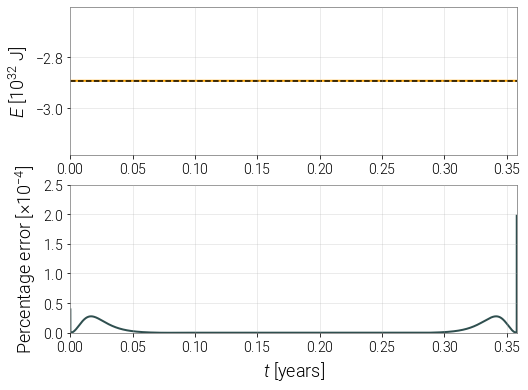

In [8]:
# check that the energy is conserved
rdot = numpy.gradient(r, dt)
energy = 0.5*MU*rdot**2 - G*M*MU/r + L**2/(2*MU*r**2)
error = numpy.abs((energy - E)/E)

# plot the total energy and its percent error
ty = t / (60 * 60 * 24 * 365)  # convert time to years
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
ax1.plot(ty, energy/1e32, 'Orange', linewidth=2)
ax1.plot([ty[0], ty[-1]], [E/1e32, E/1e32], 'k--')
ax1.set_ylim([1.1*E/1e32, 0.9*E/1e32])
ax1.set_ylabel('$E$ [$10^{32}$ J]')
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(ty, 100*error/1e-4, 'DarkSlateGray', linewidth=2)
ax2.set_xlim([ty.min(), ty.max()])
ax2.set_xlabel('$t$ [years]')
ax2.set_ylim([0, 2.5])
ax2.set_ylabel(r'Percentage error [$\times 10^{-4}$]')
plt.show()

Substituting with a symbol from Computer Modern.
Substituting with a symbol from Computer Modern.


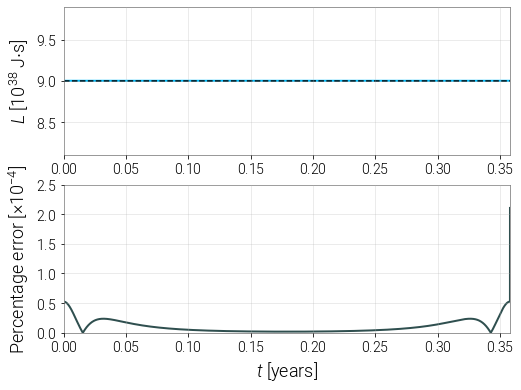

In [9]:
# check that the energy is conserved
phidot = numpy.gradient(phi, dt)
angmomentum = MU * r**2 * phidot
Lerror = numpy.abs((angmomentum - L)/L)

# plot the total energy and its percent error
fig = plt.figure(figsize=(8, 6))
ax1 = fig.add_subplot(211)
ax1.plot(ty, angmomentum/1e38, 'DeepSkyBlue', linewidth=2)
ax1.plot([ty[0], ty[-1]], [L/1e38, L/1e38], 'k--')
ax1.set_ylim([0.9*L/1e38, 1.1*L/1e38])
ax1.set_ylabel('$L$ [$10^{38}$ J$\cdot$s]')
ax2 = fig.add_subplot(212, sharex=ax1)
ax2.plot(ty, 100*Lerror/1e-4, 'DarkSlateGray', linewidth=2)
ax2.set_xlim([ty.min(), ty.max()])
ax2.set_xlabel('$t$ [years]')
ax2.set_ylim([0, 2.5])
ax2.set_ylabel(r'Percentage error [$\times 10^{-4}$]')
plt.show()